# TP2 - Bayes Inference

In [37]:
#Useful functions
import numpy as np
import matplotlib.pyplot as plt

def plot_myarray(array, xlabel, ylabel, title):
    """ Plot an array with labels.

    Args :
    array (numpy array of floats)
    xlabel (string) - label of x-axis
    ylabel (string) - label of y-axis
    title  (string) - title of plot

    Returns:
    None
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colormap = ax.imshow(array, extent=[-10, 10, 8, -8])
    cbar = plt.colorbar(colormap, ax=ax)
    cbar.set_label('probability')
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_aspect('auto')
    return None

## Tutorial Objectives

In these tutorials, we will develop a Bayesian model for 
To refine: Guess the size of an object, prior = usual size of a fork, likelihood, visual info we get about the specific fork we see. -> posterior distrib

This model will combine **prior** information about the XXX with sensory information about the **likelihood** that XXX. As we will see in subsequent lessons, the resulting **posterior distribution** not only allows us to make optimal decision about the sound's origin, but also lets us quantify how uncertain that decision is. Bayesian techniques are therefore useful **normative models**: the behavior of human or animal subjects can be compared against these models to determine how efficiently they make use of information. 

This notebook will introduce two fundamental building blocks for Bayesian statistics: the Gaussian distribution and the Bayes Theorem. You will: 

2. Use Bayes' Theorem to find the posterior from a Gaussian-distributed prior and likelihood. 
3. Change the likelihood mean and variance and observe how posterior changes.


# Section 1. Bayes' Theorem and the Posterior


Bayes' rule tells us how to combine two sources of information: the prior (e.g., a noisy representation of our expectations about the object size) and the likelihood (e.g., a noisy representation of the stimulus size on a given trial), to obtain a posterior distribution taking into account both pieces of information. Bayes' rule states:

\begin{eqnarray}
\text{Posterior} = \frac{ \text{Likelihood} \times \text{Prior}}{ \text{Normalization constant}}
\end{eqnarray}

When both the prior and likelihood are Gaussians, this translates into the following form:

$$
\begin{array}{rcl}
\text{Likelihood} &=& \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) \\
\text{Prior} &=& \mathcal{N}(\mu_{prior},\sigma_{prior}^2) \\
\text{Posterior} &\propto& \mathcal{N}(\mu_{likelihood},\sigma_{likelihood}^2) \times \mathcal{N}(\mu_{prior},\sigma_{prior}^2) \\
&&= \mathcal{N}\left( \frac{\sigma^2_{likelihood}\mu_{prior}+\sigma^2_{prior}\mu_{likelihood}}{\sigma^2_{likelihood}+\sigma^2_{prior}}, \frac{\sigma^2_{likelihood}\sigma^2_{prior}}{\sigma^2_{likelihood}+\sigma^2_{prior}} \right) 
\end{array}
$$

In these equations, $\mathcal{N}(\mu,\sigma^2)$ denotes a Gaussian distribution with parameters $\mu$ and $\sigma^2$:
$$
\mathcal{N}(\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \; \exp \bigg( \frac{-(x-\mu)^2}{2\sigma^2} \bigg)
$$

In Exercise 2A, we will use the first form of the posterior, where the two distributions are combined via pointwise multiplication.  Although this method requires more computation, it works for any type of probability distribution. In Exercise 2B, we will see that the closed-form solution shown on the line below produces the same result. 

## Exercise 1A: Finding the posterior computationally

Imagine an experiment where participants estimate the location of . To estimate its position, the participants can use two sources of information: 
  1. new noisy visual information (the likelihood)
  2. prior expectations of where the glasses is likely to be found (visual prior). 

The new visual information and the prior expectations are both noisy, so participants will combine these sources of information to better estimate the position of their glasses.

We will use Gaussian distributions to represent the visual likelihood (in red), and a Gaussian prior (expectations - in blue). Using Bayes rule, you will combine them into a posterior distribution that summarizes the probability that the object is in each location. 


Hint: 

* Use the gaussian function you wrote in the previous tutorial to generate a visual likelihood with parameters $\mu$ = 3 and $\sigma$ = 1.5
* Generate a prior with parameters $\mu$ = -1 and $\sigma$ = 1.5
* Calculate the posterior using pointwise multiplication of the likelihood and prior. Don't forget to normalize so the posterior adds up to 1. 
* Plot the likelihood, prior and posterior using the predefined function `posterior_plot`



In [12]:
def my_gaussian(x_vector,mu,sigma):
    """
  Author: Antoine de Comite 
  This function computes the gaussian distribution characterised by mu & sigma on the set x_vector
  
  Inputs : x_vector (numpy array) the set over which you want to compute the gaussian distribution
           mu (double) mean value of the gaussian distribution
           sigma (double) standard deviation of the gaussian distribution
  Outputs: px (numpy array) is the gaussian distribution evaluated over x_vector
  """
  
    px = np.exp(- 1/2/sigma**2 * (mu - x_vector) ** 2)
    px = px / px.sum()
    return px

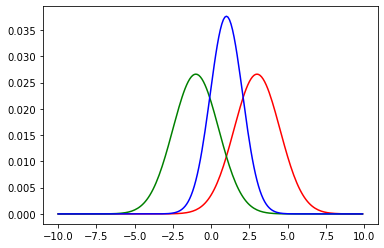

In [26]:
x_vector = np.arange(-10,10,0.1)

#######################################


def compute_posterior_pointwise(prior, likelihood):
    ''' Author: Florence Blondiaux
    Returns the normalized posterior probability based on the prior and the likelihood
    Prior: The prior probabilities
    Likelihood: The likelihood probabilities
    '''
    posterior = prior * likelihood
    posterior /= posterior.sum()
    return posterior 

likelihood = my_gaussian(x_vector,3,1.5)
prior = my_gaussian(x_vector,-1,1.5)
posterior = compute_posterior_pointwise(prior,likelihood)

plt.plot(x_vector, likelihood, 'r')
plt.plot(x_vector,prior,'g')
plt.plot(x_vector, posterior, 'b')
plt.show()

In [27]:
#@title
#@markdown Make sure you execute this cell to enable the widget!

x = np.arange(-10, 11, 0.1)

import ipywidgets as widgets

def refresh(mu_likelihood=3, sigma_likelihood=1.5, mu_prior=-1, sigma_prior=1.5):
    likelihood = my_gaussian(x, mu_likelihood, sigma_likelihood)
    prior = my_gaussian(x, mu_prior, sigma_prior)
    posterior = compute_posterior_pointwise(prior,likelihood)
    plt.plot(x, likelihood, 'r')
    plt.plot(x,prior,'g')
    plt.plot(x, posterior, 'b')

style = {'description_width': 'initial'}

_ = widgets.interact(refresh,
    mu_posterior=widgets.FloatSlider(value=3, min=-10, max=10, step=0.5, description="mu_likelihood:", style=style),
    sigma_posterior=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_likelihood:", style=style),
    mu_prior=widgets.FloatSlider(value=-1, min=-10, max=10, step=0.5, description="mu_prior:", style=style),
    sigma_prior=widgets.FloatSlider(value=1.5, min=0.5, max=10, step=0.5, description="sigma_prior:", style=style)
)

interactive(children=(IntSlider(value=3, description='mu_likelihood', max=9, min=-3), FloatSlider(value=1.5, d…

## Exercise 1B: Finding the posterior analytically

[Bonus]

As you may have noticed from the interactive demo, the product of two Gaussian distributions, like our prior and likelihood, remains a Gaussian, regardless of the parameters. We can directly compute the  parameters of that Gaussian from the means and variances of the prior and likelihood. For example, the posterior mean is given by:

$$ \mu_{posterior} = \frac{\mu_{likelihood} \cdot \frac{1}{\sigma_{likelihood}^2} + \mu_{prior} \cdot \frac{1}{\sigma_{prior}^2}}{1/\sigma_{likelihood}^2 + 1/\sigma_{prior}^2} 
$$

This formula is a special case for two Gaussians, but is a very useful one because:
*   The posterior has the same form (here, a normal distribution) as the prior, and
*   There is simple, closed-form expression for its parameters.

When these properties hold, we call them **conjugate distributions** or **conjugate priors** (for a particular likelihood). Working with conjugate distributions is very convenient; otherwise, it is often necessary to use computationally-intensive numerical methods to combine the prior and likelihood. 

In this exercise, we ask you to verify that property.  To do so, we will hold our likelihood constant as an $\mathcal{N}(3, 1.5)$ distribution, while considering priors with different means ranging from $\mu=-10$ to $\mu=10$. For each prior,

* Compute the posterior distribution using the function you wrote in Exercise 2A. Next, find its mean. The mean of a probability distribution is $\int_x p(x) dx$ or $\sum_x x\cdot p(x)$. 
* Compute the analytical posterior mean from likelihood and prior using the equation above.
* Plot both estimates of the mean. 

Are the estimates of the posterior mean the same in both cases? 

Using these results, try to predict the posterior mean for the combination of a $\mathcal{N}(-4,4)$ prior and and $\mathcal{N}(4, 2)$ likelihood. Use the widget above to check your prediction. You can enter values directly by clicking on the numbers to the right of each slider; $\sqrt{2} \approx 1.41$.

Text(0, 0.5, 'Mean of the posterior distribution')

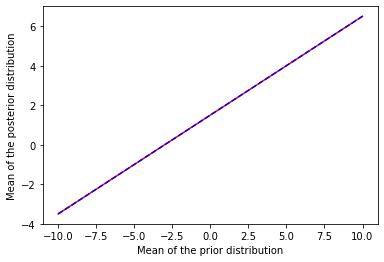

In [35]:
def compare_computational_analytical_means():
    x = np.arange(-10, 11, 0.1)
    # Fixed auditory likelihood
    mu_likelihood = 3
    sigma_likelihood = 1.5
    likelihood = my_gaussian(x, mu_likelihood, sigma_likelihood)
    # Varying visual prior
    mu_priors = np.linspace(-10, 10)
    sigma_prior = 1.5

    # Accumulate results here
    mus_by_integration = []
    mus_analytical = []
    for mu_prior in mu_priors:
        prior = my_gaussian(x, mu_prior, sigma_prior)
        posterior = compute_posterior_pointwise(prior, likelihood)
        mu_integrated = np.sum(x*posterior)
        mu_analytical = ((mu_likelihood / sigma_likelihood ** 2 + mu_prior / sigma_prior ** 2) /
                  (1 / sigma_likelihood ** 2 + 1 / sigma_prior ** 2))

        mus_by_integration.append(mu_integrated)
        mus_analytical.append(mu_analytical)

    return mu_priors, mus_analytical, mus_by_integration

mu_visuals, mu_analytical, mu_computational = compare_computational_analytical_means()
plt.plot(mu_visuals,mu_analytical,'r')
plt.plot(mu_visuals,mu_computational,'b--')
plt.xlabel('Mean of the prior distribution')
plt.ylabel('Mean of the posterior distribution')

# Title

---
  
We'll now estimate the participant response given the posterior distribution. We will describe all the steps of the generative model first. The model will be the same Bayesian model we have been using during the previous exercice: a Gaussian prior and a Gaussian likelihood.

Steps:

* First, we'll create the prior, likelihood, posterior, etc in a form that will make it easier for us to visualise what is being computed and estimated at each step of the generative model: 
  1. Generating a Gaussian prior for multiple possible stimulus inputs
  2. Generating the likelihood for multiple possible stimulus inputs
  3. Estimating our posterior as a function of the stimulus input
  4. Estimating a participant response given the posterior
  


![Generative model](https://github.com/vincentvalton/figures_NMA_W2D1_T3/blob/master/Drawing%20Generative%20Model%20W2T3.png?raw=true)


Here is a graphical representation of the generative model:

  1. We present a stimulus $x$ to participants. 
  2. The brain encodes this true stimulus $x$ noisily (this is the brain's representation of the true visual stimulus: $p(\tilde x|x)$.
  3. The brain then combine this brain encoded stimulus (likelihood: $p(\tilde x|x)$) with prior information (the prior: $p(x)$) to make up the brain's estimated position of the true visual stimulus, the posterior: $p(x|\tilde x)$. 
  3. This brain's estimated stimulus position: $p(x|\tilde x)$, is then used to make a response:  $\hat x$, which is the participant's noisy estimate of the stimulus position (the participant's percept). 
  
Typically the response $\hat x$ also includes some motor noise (noise due to the hand/arm move being not 100% accurate), but we'll ignore it in this tutorial and assume there is no motor noise.

We will use the same experimental setup as in the previous exercice. Our subject tries to locates his glasses on his bed stand.

---
# 1: Likelihood array
    
First, we want to create a likelihood, but for the sake of visualization (and to consider all possible brain encodings) we will create multiple likelihoods $f(x)=p(\tilde x|x)$ (one for each potential encoded stimulus: $\tilde x$). We will then be able to visualize the likelihood as a function of hypothesized true stimulus positions: $x$ on the x-axis and encoded position $\tilde x$ on the y-axis.


  Using the equation for the `my_gaussian` and the values in `hypothetical_stim`:
* Create a Gaussian likelihood with mean varying from `hypothetical_stim`, keeping $\sigma_{likelihood}$ constant at 1.
* Each likelihood will have a different mean and thus a different row-likelihood of your 2D array, such that you end up with a likelihood array made up of 1,000 row-Gaussians with different means. (_Hint_: `np.tile` won't work here. You may need a for-loop).
* Plot the array using the function `plot_myarray()` already pre-written and commented-out in your script

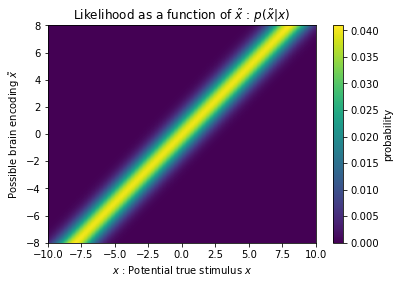

In [38]:
x = np.arange(-10, 10, 0.1)
hypothetical_stim = np.linspace(-8, 8, 1000)

def compute_likelihood_array(x_points, stim_array, sigma=1.):

    # initializing likelihood_array
    likelihood_array = np.zeros((len(stim_array), len(x_points)))

    # looping over stimulus array
    for i in range(len(stim_array)):
        likelihood_array[i, :] = my_gaussian(x_points, stim_array[i], sigma)

    return likelihood_array

likelihood_array = compute_likelihood_array(x, hypothetical_stim)

plot_myarray(likelihood_array,
              '$x$ : Potential true stimulus $x$',
              'Possible brain encoding $\~x$',
              'Likelihood as a function of $\~x$ : $p(\~x | x)$')

# 2: Prior
We want to create a prior that will describe the participants' prior knowledge that they always put their glasses in the middle of the bedside table before going to bed. We will embody this information into a prior using a Gaussian prior. For visualization reasons, we will create a prior that has the same shape (form) as the likelihood array we created in the previous exercise. That is, we want to create a Gaussian prior as a function the the brain encoded stimulus $\tilde x$. Since the prior does not change as a function of $\tilde x$ it will be identical for each row of the prior 2D array. 

Using the equation for the Gaussian `my_gaussian`:
* Generate a Gaussian with mean 0 and standard deviation 0.5 (In average glasses are in the middle of the table)
* This will be the first row of your prior 2D array
* Now repeat this for varying brain encodings $\tilde x$. Since the prior does not depend on $\tilde x$ you can just repeat the prior for each $\tilde x$ (hint: use np.tile) that row prior to make an array of 1,000 (i.e. `hypothetical_stim.shape[0]`)  row-priors.
* Plot the matrix using the function `plot_myarray()` already pre-written and commented-out in your script

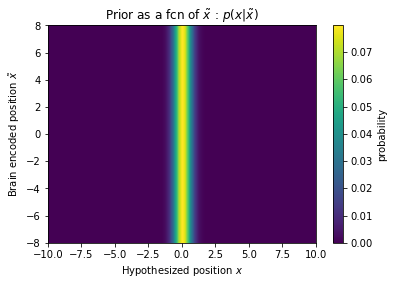

In [40]:
x = np.arange(-10, 10, 0.1)

def calculate_prior_array(x_points, stim_array,
                          mu_prior=.0, sigma_prior=.5):
    """

    """

    prior = my_gaussian(x_points, mu_prior, sigma_prior)
    
    prior_array = np.tile(prior, len(stim_array)).reshape(len(stim_array), -1)
    return prior_array

prior_array = calculate_prior_array(x, hypothetical_stim)

plot_myarray(prior_array,
               'Hypothesized position $x$', 'Brain encoded position $\~x$',
               'Prior as a fcn of $\~x$ : $p(x|\~x)$')

# 3 : Combine

#  4: Estimate


Take home message